In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root_path = 'drive/My Drive/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
path = Path('/content/drive/My Drive/Nailsproject')

In [ ]:
classes = ['Normal','Leukonychia','koinonycnia','onychomadesis','paronychia','oncholysis']

for c in classes:
  print(c)
  verify_images(c, delete = True, max_size = 500)

Normal
Leukonychia
koinonycnia
onychomadesis
paronychia
oncholysis


In [ ]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2, seed=66,ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [ ]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['Leukonychia', 'Normal', 'koinonycnia', 'oncholysis', 'onychomadesis', 'paronychia']
1903
475


In [ ]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

In [ ]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,1.948535,1.024304,0.315789,17:37
1,1.293402,0.457553,0.153684,17:06
2,0.941591,0.352958,0.128421,17:02
3,0.697991,0.209573,0.073684,17:06
4,0.530098,0.187343,0.050526,17:07
5,0.407971,0.162448,0.048421,17:08
6,0.316103,0.089932,0.023158,17:06
7,0.250412,0.086669,0.029474,17:06
8,0.199635,0.065070,0.016842,17:12
9,0.170263,0.068127,0.021053,17:07


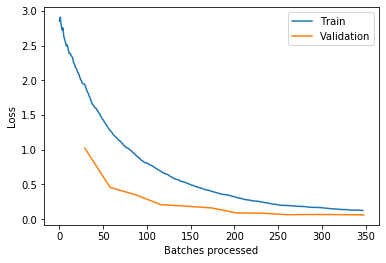

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('DR_1')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


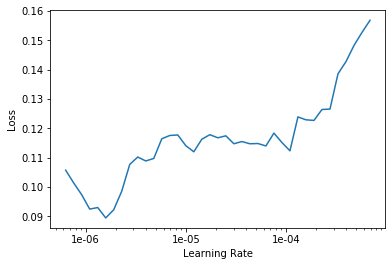

In [ ]:

learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.120119,0.086566,0.018947,22:49
1,0.153455,0.078874,0.021053,22:51
2,0.124452,0.109051,0.025263,22:51
3,0.097044,0.087076,0.025263,22:48


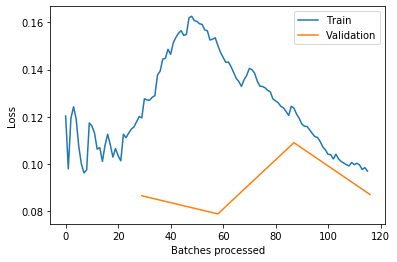

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('DR_2')

In [ ]:
learn.load('DR_1')

Learner(data=ImageDataBunch;

Train: LabelList (1903 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Normal,Normal,Normal,Normal,Normal
Path: /content/drive/My Drive/Nailsproject;

Valid: LabelList (475 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Leukonychia,koinonycnia,Leukonychia,paronychia,koinonycnia
Path: /content/drive/My Drive/Nailsproject;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (b

In [ ]:
learn.load('DR_2');

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fe2debd3eb8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

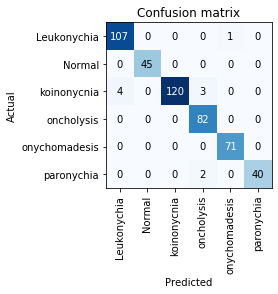

In [ ]:
interp.plot_confusion_matrix()

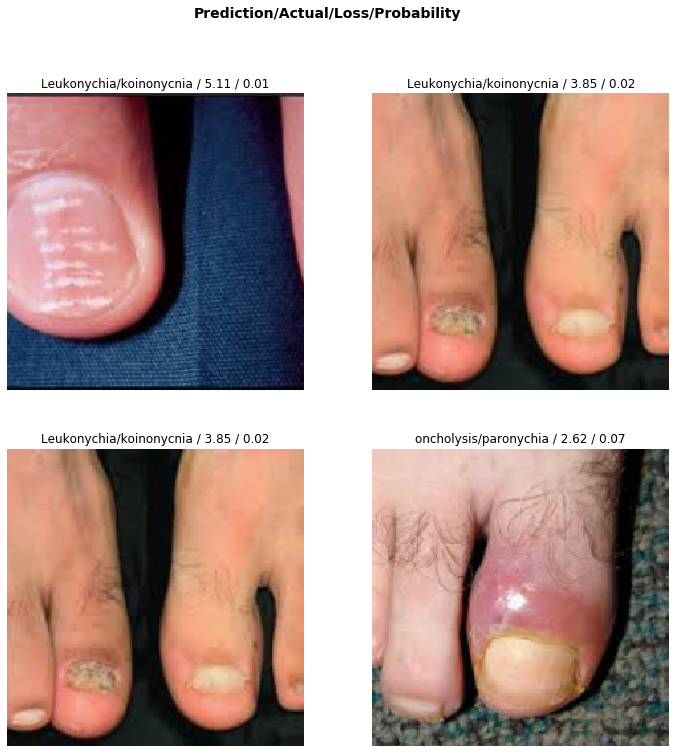

In [ ]:
interp.plot_top_losses(k = 4, heatmap=False)

In [ ]:
learn.export()

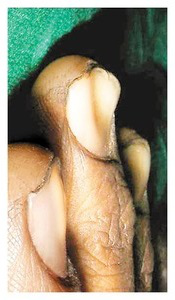

In [ ]:
img = open_image('drive/My Drive/Nailsproject/koinonycnia/1 (1).jpg')
img

In [ ]:

learn = load_learner(path)

In [ ]:

pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  koinonycnia
